# Importing libraries and loading the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


In [3]:
df.dtypes

2025_rank                         string[python]
2024_rank                         string[python]
institution_name                  string[python]
location                          string[python]
location_full                     string[python]
size                              string[python]
academic_reputation                      Float64
employer_reputation                      Float64
faculty_student                          Float64
citations_per_faculty                    Float64
international_faculty                    Float64
international_students                   Float64
international_research_network           Float64
employment_outcomes                      Float64
sustainability                           Float64
qs_overall_score                  string[python]
dtype: object

In [4]:
#df['qs_overall_score'] = df['qs_overall_score'].str.replace('-','0', regex = False)

In [5]:
#df['qs_overall_score'] = df['qs_overall_score'].astype('Float64')

In [6]:
df['qs_overall_score'] = pd.to_numeric(df['qs_overall_score'], errors='coerce')

In [7]:
df.shape

(1503, 16)

In [8]:
df.describe()

,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
count,1503.0,1503.0,1503.0,1503.0,1403.0,1445.0,1502.0,1503.0,1484.0,600.0
mean,20.28656,19.786693,28.128676,23.50346,30.725374,25.580346,50.129095,23.825083,24.309299,41.837667
std,22.32623,23.784986,27.613017,27.870692,34.328935,31.098689,29.866588,27.351315,31.074718,18.825747
min,1.3,1.1,1.0,1.0,1.0,1.0,1.0,1.2,1.0,20.8
25%,6.3,4.3,7.3,2.8,4.2,2.9,22.725,4.0,1.3,26.575
50%,11.0,9.4,16.0,9.9,12.5,9.6,51.1,11.8,6.75,36.35
75%,23.5,25.3,40.4,36.4,51.6,38.3,77.1,33.4,39.5,52.1
max,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


Questions

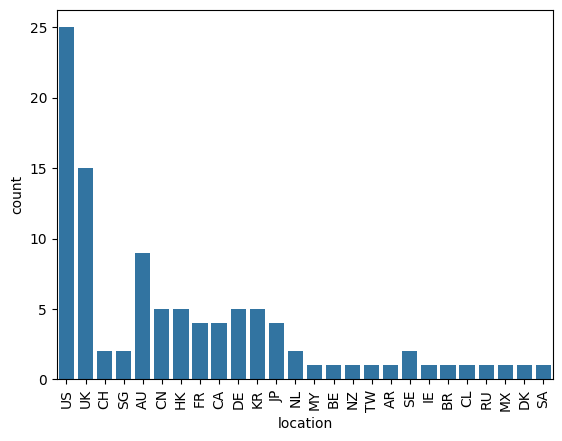

In [9]:
sns.countplot(data = df[df.index < 101], x = "location")
plt.xticks(size = 10, rotation = 90)
plt.show()

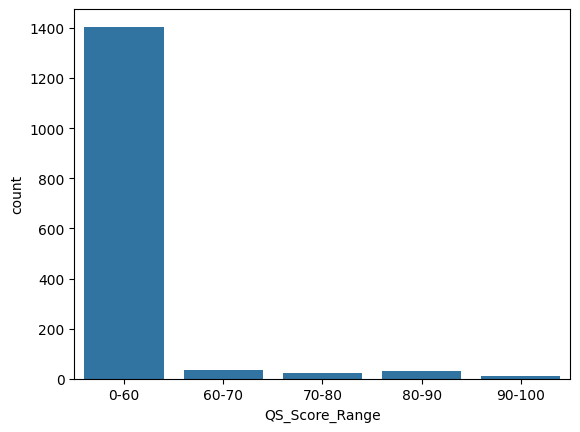

In [11]:
bins = [0, 60, 70, 80, 90, 100]
labels = ['0-60', '60-70', '70-80', '80-90', '90-100']

df['QS_Score_Range'] = pd.cut(df['qs_overall_score'], bins=bins, labels=labels, include_lowest=True)

sns.countplot(data = df, x = 'QS_Score_Range')
plt.show()

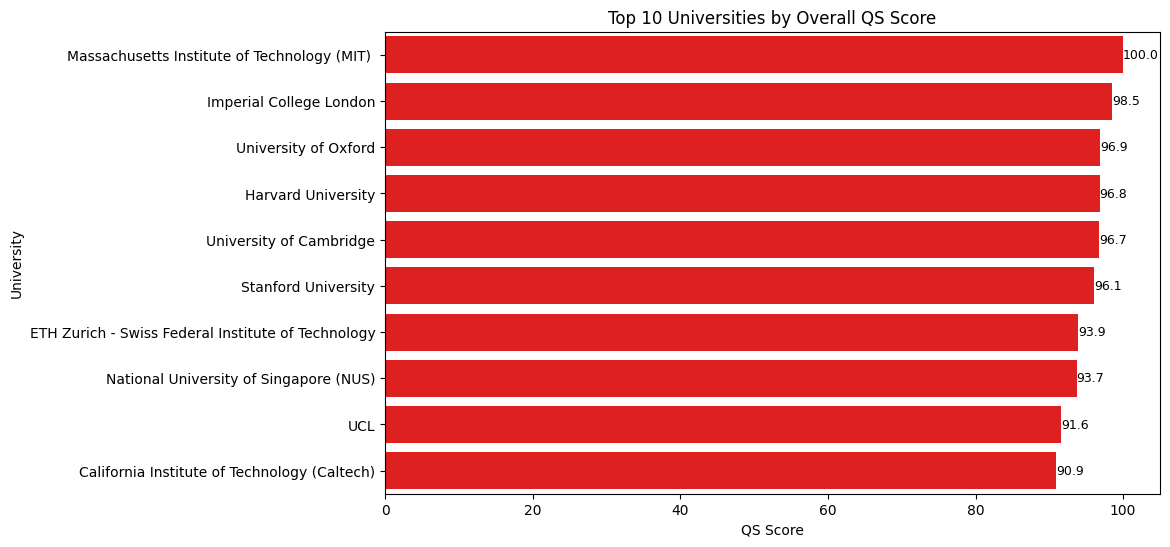

In [26]:
top_10_universities = df.sort_values('qs_overall_score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
barplt = sns.barplot(y='institution_name', x='qs_overall_score', data=top_10_universities, color = 'red')

for index, value in enumerate(top_10_universities['qs_overall_score']):
    barplt.text(value, index, round(value, 2), color='black', ha="left", va="center", size  = 9)

plt.xlabel('QS Score')
plt.ylabel('University')
plt.title('Top 10 Universities by Overall QS Score')

plt.show()

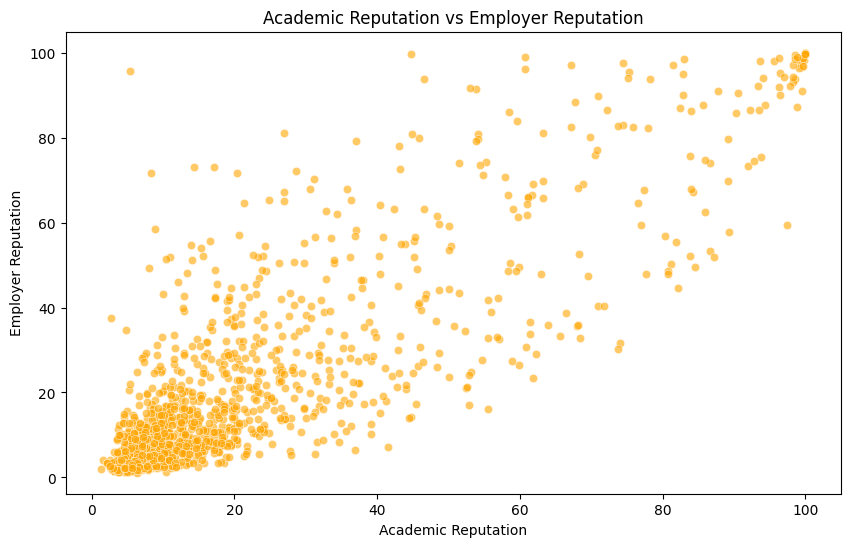

In [27]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='academic_reputation', y='employer_reputation', data=df, alpha=0.6, color='orange')
plt.xlabel('Academic Reputation')
plt.ylabel('Employer Reputation')
plt.title('Academic Reputation vs Employer Reputation')

plt.show()

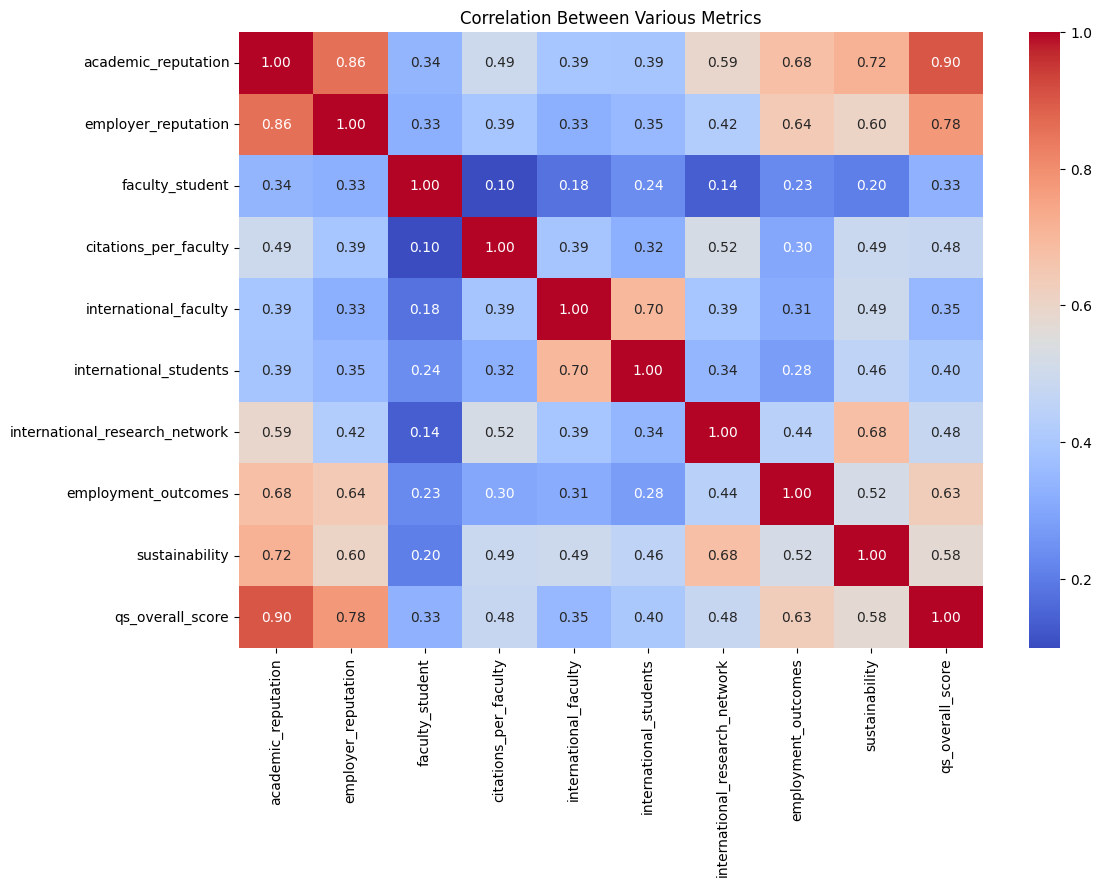

In [29]:
metrics = df[['academic_reputation', 'employer_reputation', 'faculty_student', 'citations_per_faculty',
              'international_faculty', 'international_students', 'international_research_network',
              'employment_outcomes', 'sustainability', 'qs_overall_score']]

corr_matrix = metrics.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Various Metrics')
plt.show()

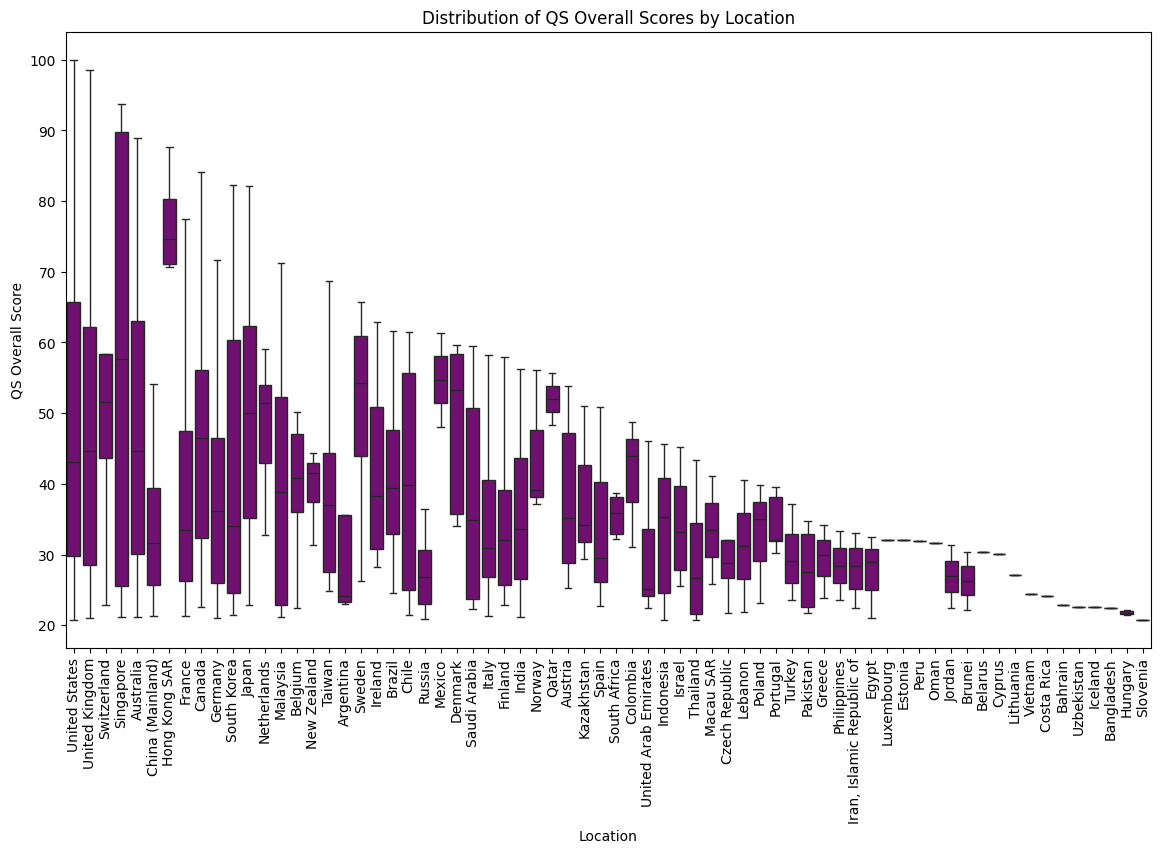

In [36]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='location_full', y='qs_overall_score', data=df[~df['qs_overall_score'].isna()], showfliers=False, color = 'purple')

plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('QS Overall Score')
plt.title('Distribution of QS Overall Scores by Location')
plt.show()